# Hospital Expenses
Name: Goh Pin Pin Isaac<br>
Admin Number: P2317623<br>
Class: DAAA/FT/1B/07<br>
<br>

# Project Objective
<hr>
Create a *supervised classification* model to predict if water is safe drinkable (Potable) or not

# Background
<hr>

This is a dataset to predict the hospital cost in US hospitals based on various patient
information, such as ID, Age, Gender, BMI, etc.


In the Jupyter notebook, write your report detailing your implementation, your
experiments and analysis (along with your python code and comments). We
would like to know:
<hr>
<br><br><br>

### Regression model performance:
- R-sqaured | Coefficient of determination
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Square Deviation (RMSE)

### STEPS for Regression
1. Getting Data ready (import file)
2. Get target(*y*) & features(*X*) 
3. Continuize Categorical Data
4. Split data (*Train* | *Test*) 
5. Choose the right estimator/algorithm
6. Fit the model/algorithm (*Train*)
7. Evaluate Model
8. Improve Model
9. Compare (*run test data according to y_test*)
10. Save Model

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns

# Plotting
import matplotlib.pyplot as plt


# Dataset Processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer


# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split


# Model Evaluation
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# To Ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Models
from sklearn.linear_model import Lasso  
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
# Set the SEED for random (Same Random results when re-ran)
random_state = 17

# 1. Importing CSV

In [2]:
dataset = pd.read_csv('./CA1-Dataset/CA1-Regression-Dataset.csv', sep=',')
dataset.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


# Exploratory Data Analysis
This is a dataset is collected from patients accross US. it contains 1337 data points with 7 columns(floats).

- **ID:**                   It is a primary key (it is not a feature to describe patient) **Can Drop**
- **Age:**                  In Years
- **Gender:**               Male | Female
- **BMI:**                  weight(kg) / height^2(m)
- **Region:**               Northeast | Northwest | Southeast | Southwest
- **Cost ($):**             Total Price of Hospital Bill **(TARGET)**

### Data Exploration 
To find any correlation of medical charges with features listed in the dataset. Read along if you are curious about this exploration.

In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Dataset Stastistics

In [8]:
dataset.describe().style.background_gradient(cmap="Blues")

,ID,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,13270.422265
std,386.391641,14.049960,6.098187,12110.011237
min,1.000000,18.000000,15.960000,1121.873900
25%,335.250000,27.000000,26.296250,4740.287150
50%,669.500000,39.000000,30.400000,9382.033000
75%,1003.750000,51.000000,34.693750,16639.912515
max,1338.000000,64.000000,53.130000,63770.428010


### checking to see if theres any null values in the dataset

In [9]:
dataset.isna().sum()

ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

### Dependent Variable (Cost ($))
this is the variable our model will be predicting

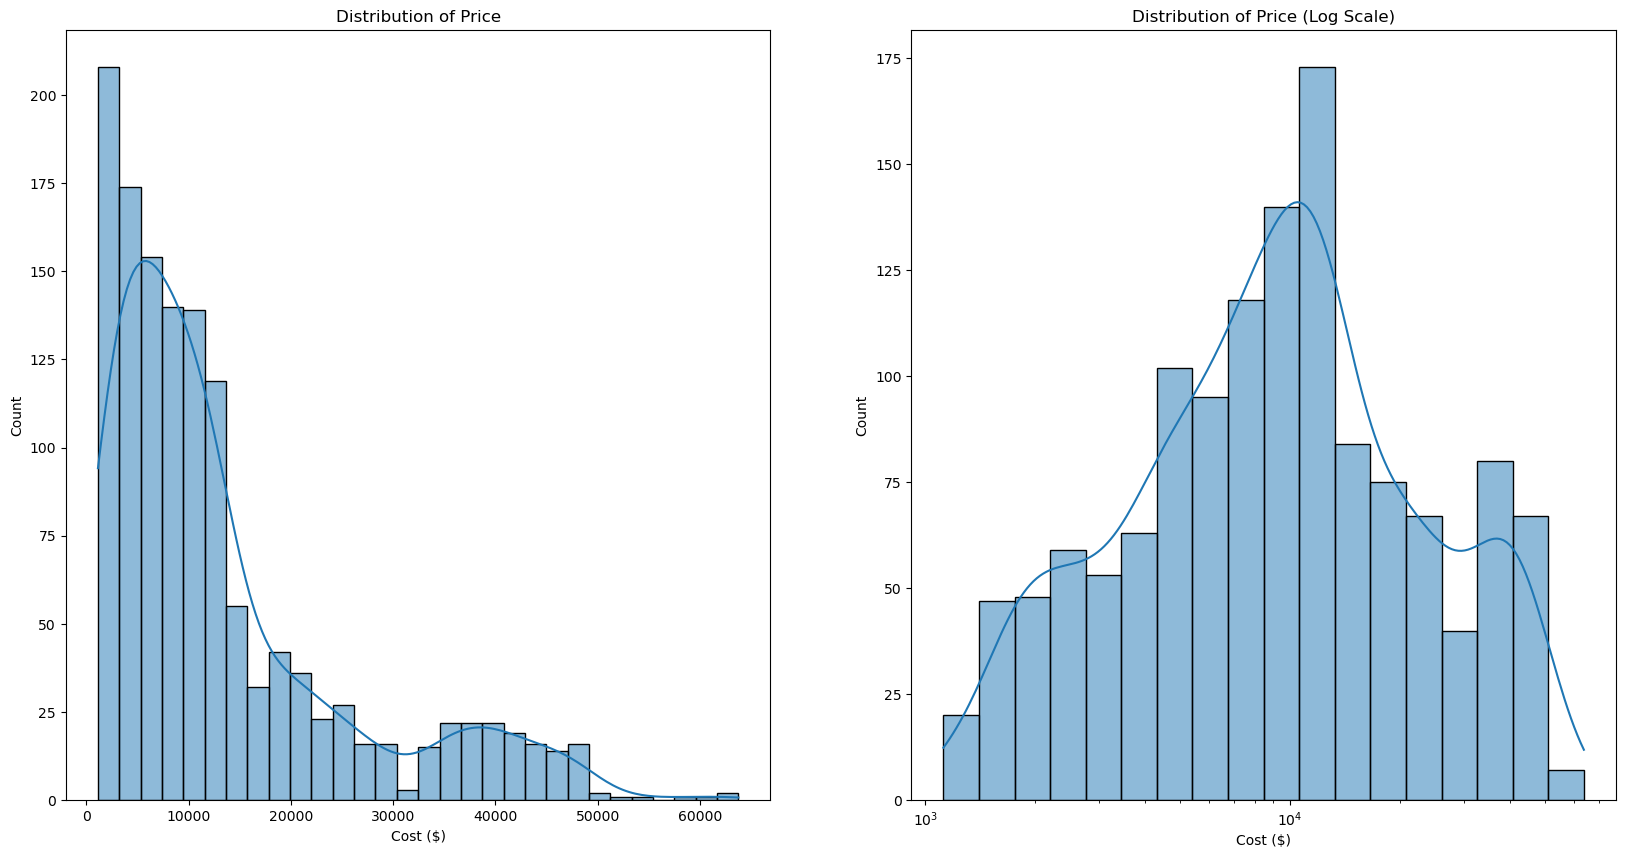

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=dataset, x="Cost ($)", kde=True, ax=ax[0])
ax[0].set_title("Distribution of Price")
sns.histplot(data=dataset, x="Cost ($)", kde=True, log_scale=True, ax=ax[1])
ax[1].set_title("Distribution of Price (Log Scale)")
plt.show()

### Independent Variables (Featues)

In [11]:
independent = dataset.drop("Cost ($)", axis=1)
independent

,ID,Age,Gender,BMI,Smoker,Region
0,1,19,female,27.900,yes,southwest
1,2,18,male,33.770,no,southeast
2,3,28,male,33.000,no,southeast
3,4,33,male,22.705,no,northwest
4,5,32,male,28.880,no,northwest
...,...,...,...,...,...,...
1333,1334,50,male,30.970,no,northwest
1334,1335,18,female,31.920,no,northeast
1335,1336,18,female,36.850,no,southeast
1336,1337,21,female,25.800,no,southwest


# Bivariate Analysis
the analysis of two variables to determine relationships between them.

### Plotting (Cost against Age for (Male | Female))
We can see that age has a positive slope<br>
However, Gender seems to have the same graph/results as each other. Both males and females show similar influence of Cost<br>
This means that they could have a small corrilation to the Cost

We can see that age has a positive slope while gender doesnt have much relationship

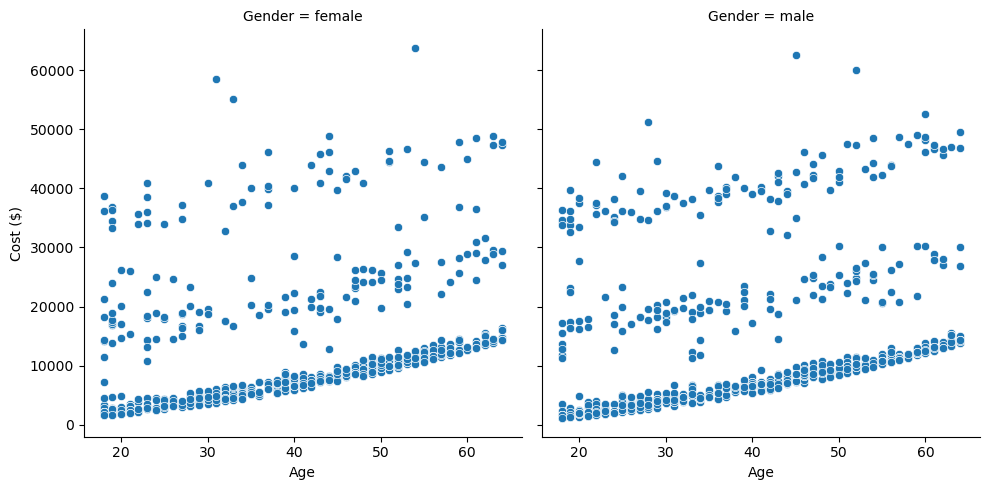

In [13]:
sns.relplot(x='Age', y='Cost ($)', col='Gender',data=dataset, palette='husl')

### Plotting (Cost against Smoker and Age)
We can see that Smoking or not plays a huge role as theres a shocking distance between those that smoke and those that dont

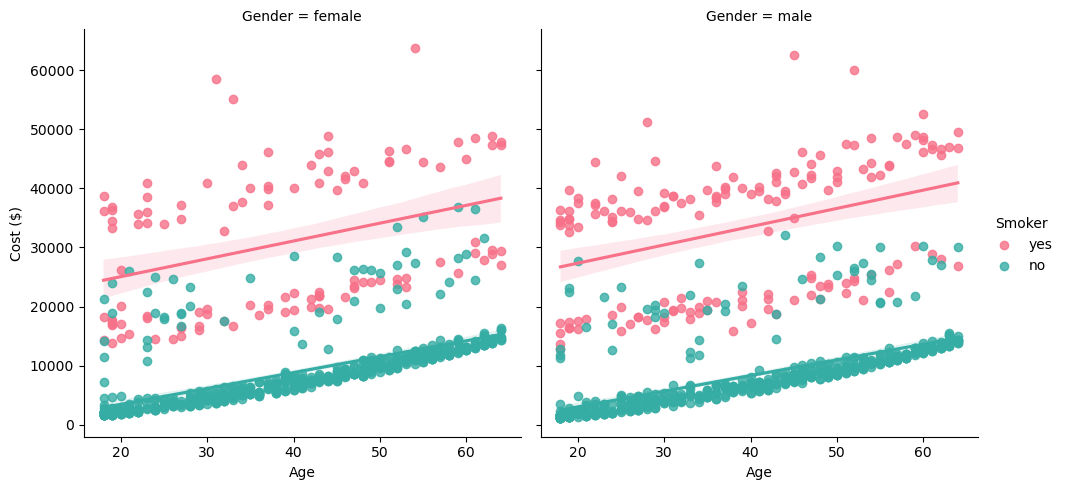

In [14]:
sns.lmplot(x='Age', y='Cost ($)', hue='Smoker', col='Gender',data=dataset, palette='husl')

### Smoking and the Genders
we can see that theres a higher percentage of males that smoke compared to females

Text(0.5, 1.0, 'Effect of Smoking on Charges of males and females')

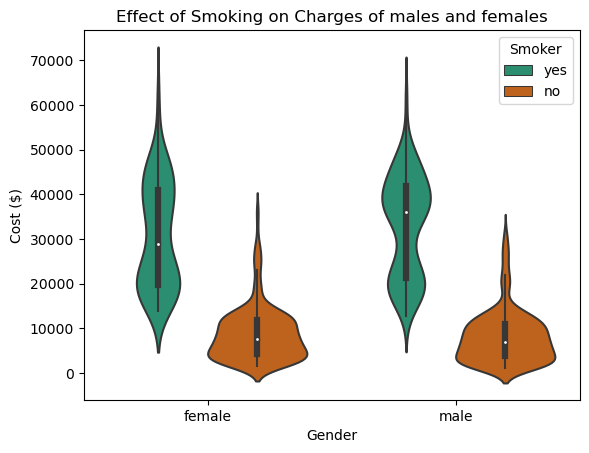

In [15]:
sns.violinplot(x="Gender", y='Cost ($)', hue="Smoker", data=dataset, palette='Dark2')
plt.title('Effect of Smoking on Charges of males and females')

### BMI and smoking on genders separately
Both males and females show similar influence of smoking and BMI.

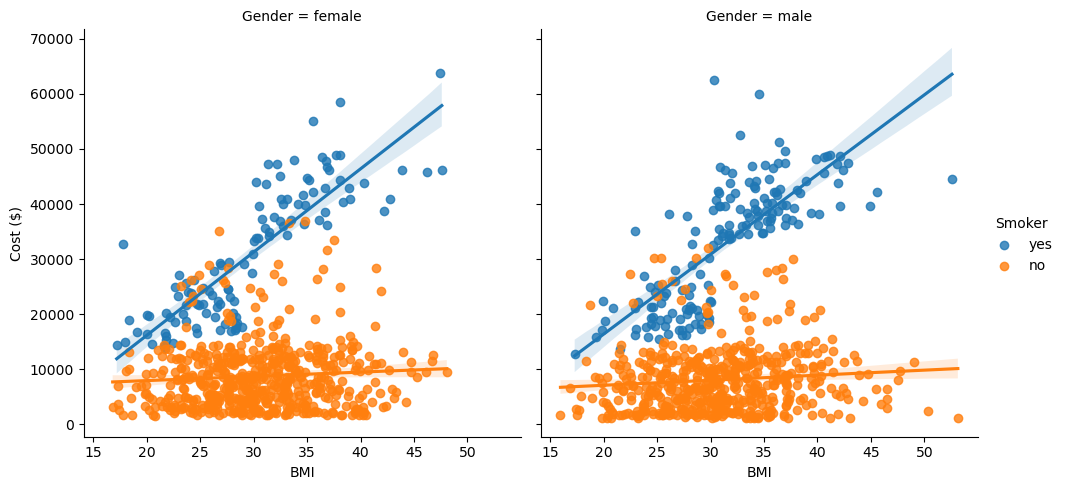

In [16]:
sns.lmplot(x='BMI',y='Cost ($)',hue='Smoker', col='Gender',data=dataset)

### Finding any corrilation to each feature

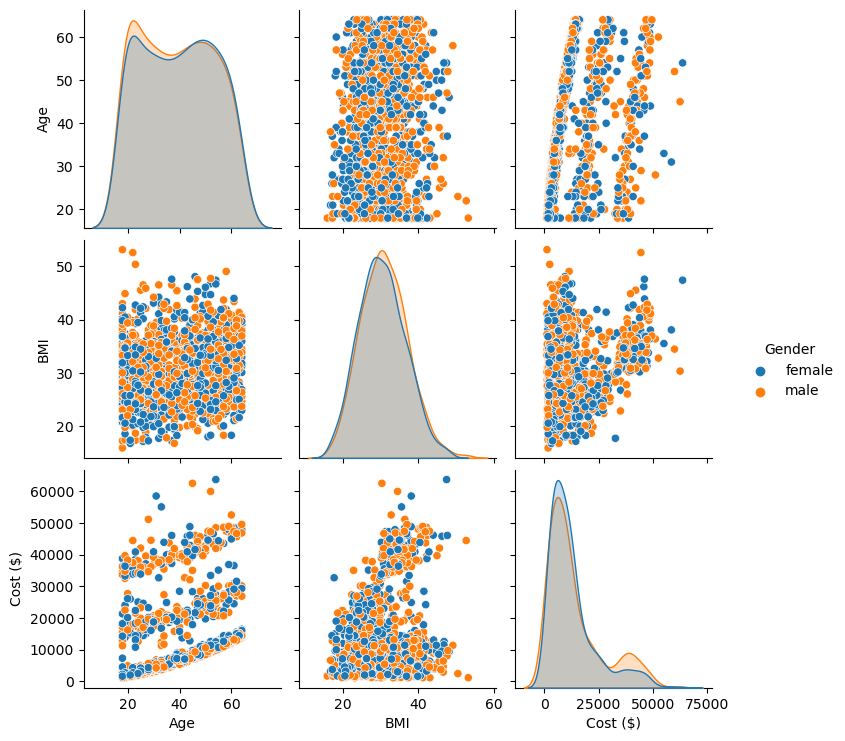

In [17]:
sns.pairplot(dataset, vars= ['Age','BMI','Cost ($)'], hue='Gender')

### Region feature against Cost (%)

<Axes: xlabel='Region', ylabel='Cost ($)'>

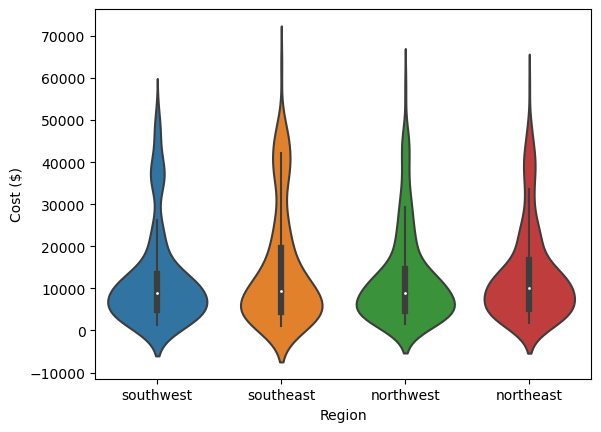

In [18]:
sns.violinplot(x="Region", y='Cost ($)', data=dataset)

We can observe that there are slightly more charges for people living in southeast region compared to the rest

### Region and Smoker feature against Cost (%)

<Axes: xlabel='Region', ylabel='Cost ($)'>

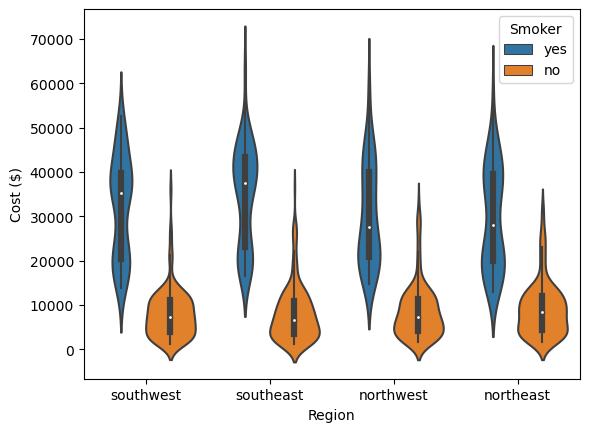

In [19]:
sns.violinplot(x="Region", y='Cost ($)', hue="Smoker", data=dataset)

there is also more smokers in southeast and southwest which could explain the high density around $40_000

# Feature Engineering

BMI is used for calculating the amount of body fat in one's body
- BMI X < 18.5        underweight range
- BMI 18.5 < X < 25,  healthy weight range
- BMI 25.0 < X < 30,  overweight range
- BMI 30.0 < X,       obesity range

Formula:
\begin{equation}
BMI = \frac{Mass (kg)}{Height (m)\times Height(m)}
\end{equation}

In [20]:
temp_dataset = dataset.copy()
temp_dataset['new_BMI'] = [0]*dataset['BMI']

temp_dataset['new_BMI'].mask(dataset['BMI'] <= 18.5, "1",inplace=True)
temp_dataset['new_BMI'].mask((dataset['BMI'] > 18.5) & (dataset['BMI'] <= 25), "2",inplace=True)
temp_dataset['new_BMI'].mask((dataset['BMI'] > 25) & (dataset['BMI'] <= 30), "3",inplace=True)
temp_dataset['new_BMI'].mask(dataset['BMI']>30, "4",inplace=True)
temp_dataset['new_BMI'] = temp_dataset['new_BMI'].replace({"1": "underweight", "2": "healthy", "3": "overweight", "4": "obesity"})
temp_dataset = temp_dataset.drop(['BMI'], axis=1)

In [21]:
temp_dataset

,ID,Age,Gender,Smoker,Region,Cost ($),new_BMI
0,1,19,female,yes,southwest,16884.92400,overweight
1,2,18,male,no,southeast,1725.55230,obesity
2,3,28,male,no,southeast,4449.46200,obesity
3,4,33,male,no,northwest,21984.47061,healthy
4,5,32,male,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...
1333,1334,50,male,no,northwest,10600.54830,obesity
1334,1335,18,female,no,northeast,2205.98080,obesity
1335,1336,18,female,no,southeast,1629.83350,obesity
1336,1337,21,female,no,southwest,2007.94500,overweight


# Data Processing
Note that the columns "*Gender*", "*Smoker*", "*Region*" and the newly created "*new_BMI*" has Categorical values. We would need to Continuize the columns so the model can better interpret the data

In [22]:
temp_dataset.dtypes

ID            int64
Age           int64
Gender       object
Smoker       object
Region       object
Cost ($)    float64
new_BMI      object
dtype: object

In [23]:
def preprocess_inputs(df):
    df = df.copy()

    # Binary encoding
    df['Gender'] = df['Gender'].replace({'female' : 0, 'male': 1})
    df['Smoker'] = df['Smoker'].replace({'no' : 0, 'yes': 1})

    # One-hot encoding
    region_dummies = pd.get_dummies(df['Region'],dtype=int,prefix='Region')
    df = pd.concat([df, region_dummies], axis=1)
    df = df.drop(['Region', 'ID'], axis=1)

    return df

In [24]:
def new_feature(df):
    df = df.copy()

    df['new_BMI'] = [0]*dataset['BMI']
    df['new_BMI'].mask(df['BMI'] <= 18.5, "1",inplace=True)
    df['new_BMI'].mask((df['BMI'] > 18.5) & (df['BMI'] <= 25), "2",inplace=True)
    df['new_BMI'].mask((df['BMI'] > 25) & (df['BMI'] <= 30), "3",inplace=True)
    df['new_BMI'].mask(df['BMI']>30, "4",inplace=True)
    df['new_BMI'] = df['new_BMI'].replace({"1": "underweight", "2": "healthy", "3": "overweight", "4": "obese"})
    df = df.drop(['BMI'], axis=1)

    bmi_dummies = pd.get_dummies(df['new_BMI'],dtype=int,prefix='BMI')
    df = pd.concat([df, bmi_dummies], axis=1)
    df = df.drop(['new_BMI'], axis=1)

    return df

# Correlation without new Feature

<Axes: >

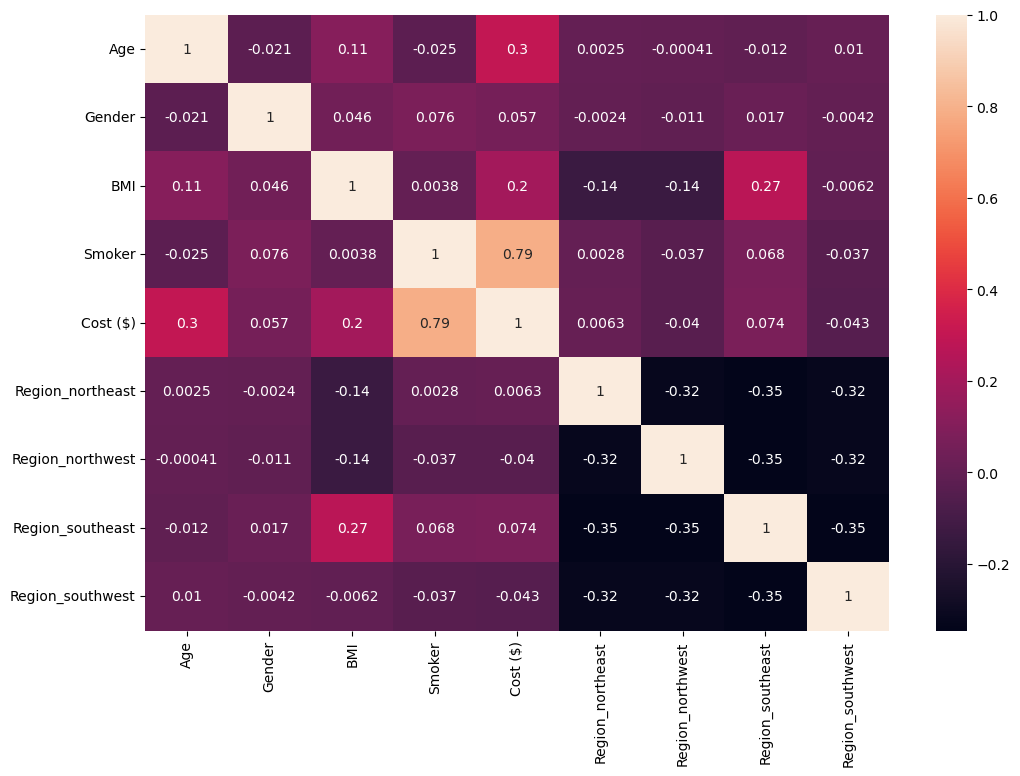

In [25]:
dataset_old = preprocess_inputs(dataset)
plt.figure(figsize=(12,8))
sns.heatmap(dataset_old.corr(),annot=True)

# Correlation with new Feature

,Age,Gender,Smoker,Cost ($),Region_northeast,Region_northwest,Region_southeast,Region_southwest,BMI_healthy,BMI_obese,BMI_overweight,BMI_underweight
0,19,0,1,16884.92400,0,0,0,1,0,0,1,0
1,18,1,0,1725.55230,0,0,1,0,0,1,0,0
2,28,1,0,4449.46200,0,0,1,0,0,1,0,0
3,33,1,0,21984.47061,0,1,0,0,1,0,0,0
4,32,1,0,3866.85520,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,0,10600.54830,0,1,0,0,0,1,0,0
1334,18,0,0,2205.98080,1,0,0,0,0,1,0,0
1335,18,0,0,1629.83350,0,0,1,0,0,1,0,0
1336,21,0,0,2007.94500,0,0,0,1,0,0,1,0


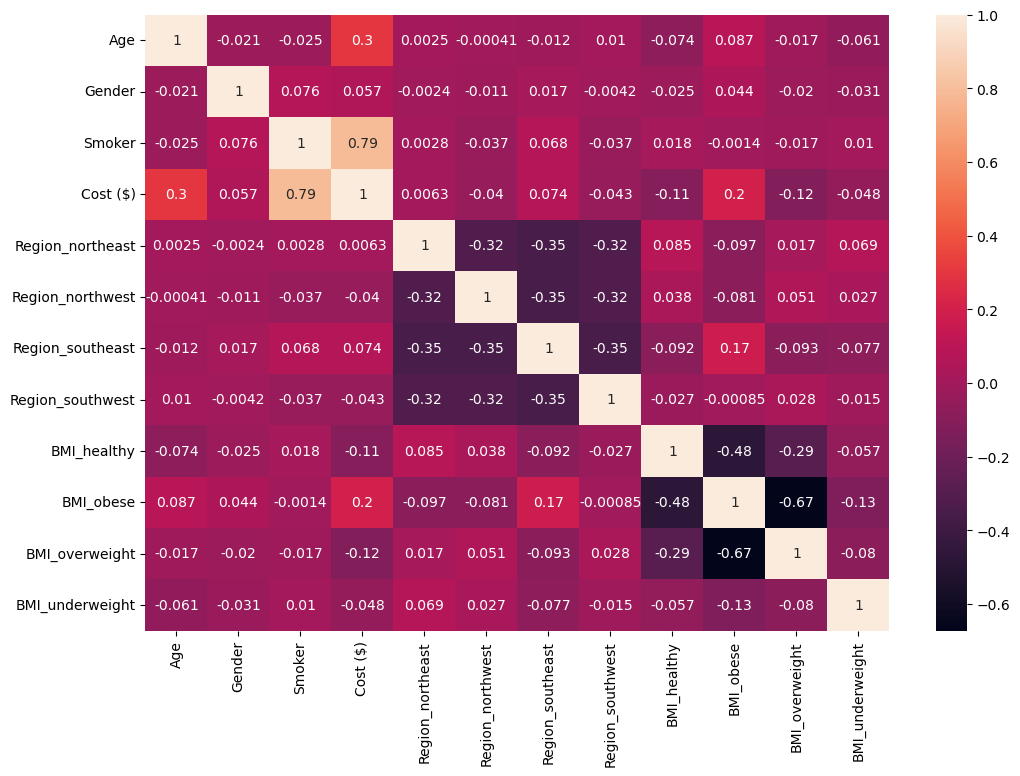

In [26]:
patient_info = preprocess_inputs(dataset)
patient_info = new_feature(patient_info)
plt.figure(figsize=(12,8))
sns.heatmap(patient_info.corr(),annot=True)
patient_info

### Observations
- Highest Corrilation to Cost ($) - **Smoker**, **Age**
- Lowest Corrilation to Cost ($) - **Gender**

In [27]:
# Seperating Target and Features
X = patient_info.drop("Cost ($)", axis=1)
y = patient_info["Cost ($)"]

In [28]:
# Splitting the data into Train(70%) & Test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)       # Spliting Data (Test | Train)

In [29]:
print(X_test.shape)
print(X_train.shape)

(402, 11)
(936, 11)


# Scaling Features
The data may be different units and may confuse the model
### Methods
- Standardization
    - the mean and divide by variance
    - features centered to 0 & variance = 1
- Normalization
    - data ranges from -1 to +1
<br><br><br>

Note that only **SOME** models are affected by scaling:
- KNN
- Linear Regression (plus Ridge, Lasso)
- Logistic Regression
- Artifcial Neural Network

In [30]:
# preset scoring options
scoring_methods = [
    "r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error",
]

In [31]:
steps = [
    ("standardize", StandardScaler()),
    ("model", DummyRegressor())
]
dummy = Pipeline(steps)
dummy.fit(X_train, y_train)
print(f"Baseline Accuracy Score :{dummy.score(X_test, y_test)}")

scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_methods,
    n_jobs=4,
    return_train_score=True
)

# displaying scores
display(pd.DataFrame(scores).style.background_gradient(cmap="Blues"))

Baseline Accuracy Score :-0.027821835984856103


,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.003544,0.002999,-0.042225,0.000000,-15070.764914,-12176.947291,-11822.759173,-9195.045154,-1.635679,-1.494198,-227127955.104818,-148278045.326778
1,0.003574,0.001982,-0.009599,0.000000,-11723.368358,-12577.857194,-8978.301406,-9690.068632,-1.639286,-1.558944,-137437365.663717,-158202491.589018
2,0.003000,0.002000,-0.020969,0.000000,-10922.102780,-12658.633540,-8956.235636,-9711.076523,-1.831989,-1.544060,-119292329.131783,-160241003.102176
3,0.003000,0.002000,-0.048986,0.000000,-9438.440823,-12791.895240,-7692.194418,-9873.192398,-1.320989,-1.608568,-89084165.161077,-163632583.825787
4,0.003001,0.005527,-0.029845,0.000000,-15531.425694,-12111.129423,-11844.511409,-9208.881881,-1.666475,-1.496814,-241225184.074206,-146679455.902352
5,0.002981,0.002021,-0.009442,0.000000,-12723.829305,-12468.933467,-9660.714912,-9512.219124,-1.357758,-1.553289,-161895832.186797,-155474301.804088
6,0.002000,0.002000,-0.002051,0.000000,-13115.716291,-12423.835891,-9816.979707,-9522.385917,-1.509732,-1.546311,-172022013.817119,-154351698.248100
7,0.003512,0.001573,-0.000199,0.000000,-11715.458640,-12577.121242,-9091.681761,-9634.299187,-1.502032,-1.558859,-137251971.155929,-158183978.738890
8,0.002513,0.001573,-0.005854,0.000000,-13298.623743,-12402.665861,-9915.029327,-9579.803939,-1.690831,-1.551170,-176853393.461691,-153826120.456021
9,0.002579,0.002943,-0.025025,0.000000,-10203.518778,-12722.718834,-8068.736152,-9808.623327,-1.355390,-1.597170,-104111795.455860,-161867574.526449


the baseline kept guessing the mean of the values which gave an r2 value close to 0

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(4,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   

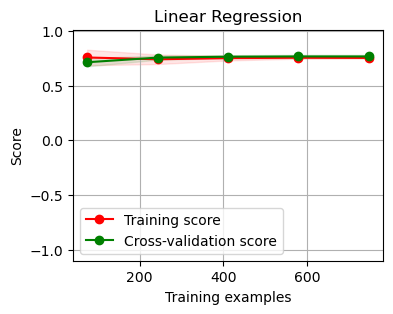

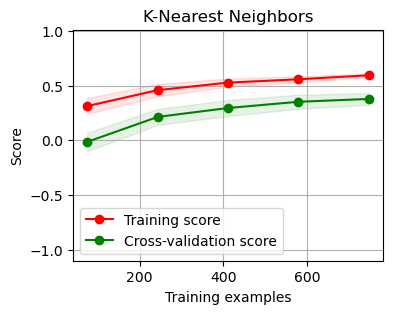

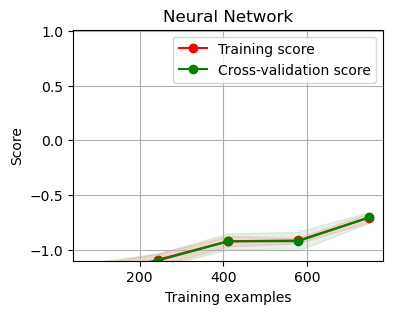

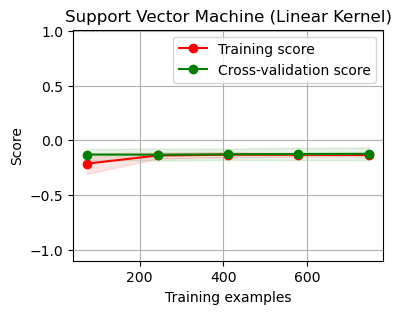

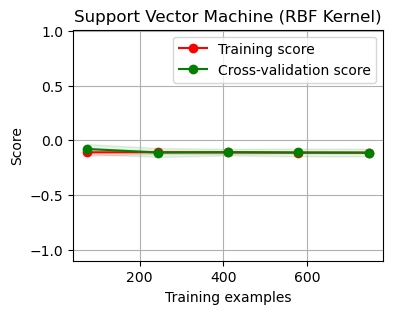

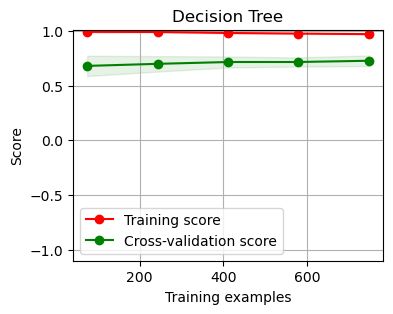

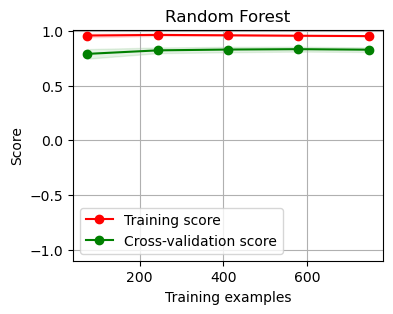

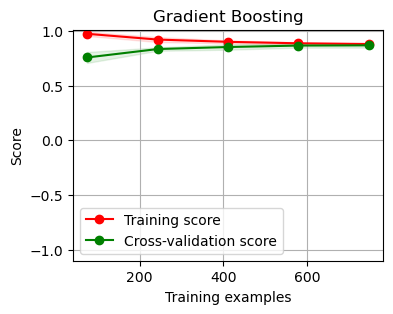

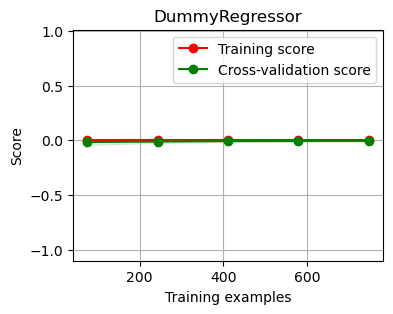

In [33]:
MODELS = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "Support Vector Machine (RBF Kernel)": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "DummyRegressor": DummyRegressor()
}
outputs = []
for model in MODELS:             # Testing out ALL the Models
    title = model
    # SVC is more expensive so we do a Lower number of CV iterations:
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = MODELS[model]
    plot_learning_curve(estimator, title, X_train, y_train, (-1.1, 1.01), cv=cv, n_jobs=4)
    score = cross_validate(
            estimator,
            X_train,
            y_train,
            scoring=scoring_methods,
            n_jobs=3,
            verbose=1,
            cv=10,
            return_train_score=True,
        )
    outputs.append(pd.Series(score, name=model).apply(np.mean))
plt.show()

## Types of learning curves
- Bad Learning Curve: High Bias
    - When training and testing errors converge and are high
    - No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic errors
    - Poor fit
    Poor generalization
- Bad Learning Curve: High Variance
    - When there is a large gap between the errors
    - Require data to improve
    - Can simplify the model with fewer or less complex features
- Ideal Learning Curve
    - Model that generalizes to new data
    - Testing and training learning curves converge at similar values
    - Smaller the gap, the better our model generalizes

## Observations
we can see that some of the models are overfitted even after adding more data like (RandomForest).<br>
The models that we have to focus on is those that converges (Gradient Boosting and KNN)

In [34]:
display(pd.DataFrame(outputs).style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()]
))

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
Linear Regression,0.008101,0.002768,0.723512,0.756038,-6225.053110,-6167.252246,-4358.168674,-4303.065496,-0.456252,-0.452937,-39056691.192732,-38038336.697054
K-Nearest Neighbors,0.002203,0.003106,0.363773,0.608298,-9685.522796,-7813.431566,-6571.340484,-5158.671755,-0.727724,-0.556813,-95043530.418191,-61062707.656207
Neural Network,0.385496,0.002155,-0.524439,-0.503446,-15124.350580,-15314.930080,-9468.656693,-9481.943280,-0.494137,-0.496511,-234444545.260253,-234641667.517585
Support Vector Machine (Linear Kernel),0.002414,0.002126,-0.134237,-0.129646,-13078.888652,-13276.599379,-7343.312616,-7342.887379,-0.463343,-0.463005,-176310671.447520,-176333024.678406
Support Vector Machine (RBF Kernel),0.022413,0.007097,-0.114253,-0.109305,-12973.172466,-13156.471752,-8681.717142,-8673.446179,-1.018259,-1.017002,-173290389.894634,-173152099.165905
Decision Tree,0.004281,0.002199,0.678483,0.967313,-6624.202055,-2253.105597,-3548.119042,-738.957205,-0.442000,-0.116256,-44512041.658517,-5092111.855938
Random Forest,0.333889,0.009155,0.783508,0.951322,-5437.079768,-2752.427368,-3203.257565,-1483.420013,-0.395251,-0.195238,-30256707.001294,-7584818.334850
Gradient Boosting,0.060223,0.002405,0.829525,0.881345,-4787.995181,-4299.491823,-2828.373130,-2469.266587,-0.336461,-0.296070,-23764460.404062,-18494134.175450
DummyRegressor,0.000767,0.001546,-0.019419,0.000000,-12374.324933,-12491.173798,-9584.714390,-9573.559608,-1.551016,-1.550938,-156630200.521300,-156073725.351966


The ones highlighted in green is the highest of the column and the ones in red are lowest<br>
From the table we can see that **(Gradient Boosting)** has the highest amount of **green** and **(Neural Network)** has the most amount of **RED**<br>
However, though its good to look at the overview, we must focus on the **test** scores<br>

**Scoring Methods**
- **Scoring Methods**
    - R-sqaured | Coefficient of determination
        - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.
        - if all your model does is predict the mean of the targets, it's R^2 value would be 0
        - if your model perfectly predicts a range of numbers it's R^2 value would be 1.
    - Mean Absolute Error (MAE)
        - the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models prediction are.
        - Absolute(actual values - Predicted Values) => MEAN
    - Mean Squared Error (MSE)
        - the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models prediction are.
        - Square(actual values - Predicted Values) => MEAN
    - Root Mean Square Deviation (NRMSE)
        - NRMSE is measured in the same units as the target variable.
        - MSE is measured in units that are the *square* of the target variable

### After looking at the over view, 
Models to work with (The Learning curve seems promising where more data gets better results)
- GradiantBoosting
- KNearestNeighbors

##### lets compare them to the dummy baseline

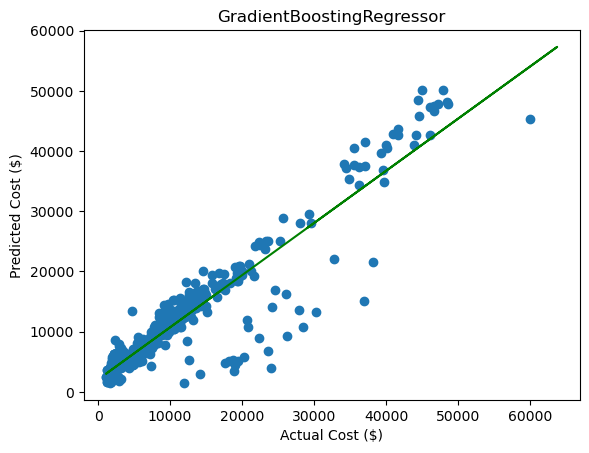

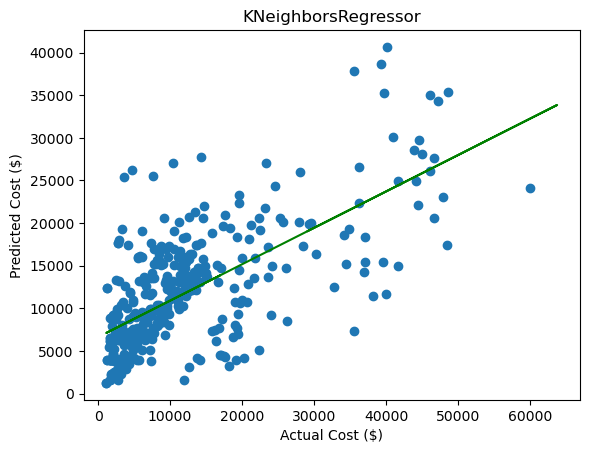

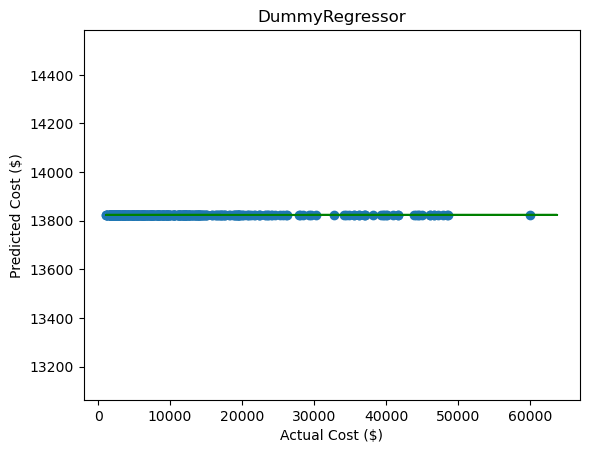

In [35]:
gradiantBoost = GradientBoostingRegressor().fit(X_train,y_train)
gradiantBoost_y_pred = gradiantBoost.predict(X_test)
plt.scatter(y_test, gradiantBoost_y_pred)
plt.xlabel("Actual Cost ($)")
plt.ylabel("Predicted Cost ($)")
a, b = np.polyfit(y_test, gradiantBoost_y_pred, 1)
plt.plot(y, a * y + b, "g-", label="Best Fit")
plt.title("GradientBoostingRegressor")
plt.show()

knn = KNeighborsRegressor().fit(X_train,y_train)
y_pred = knn.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cost ($)")
plt.ylabel("Predicted Cost ($)")
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y, a * y + b, "g-", label="Best Fit")
plt.title("KNeighborsRegressor")
plt.show()

baseline = DummyRegressor().fit(X_train,y_train)
y_pred = baseline.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cost ($)")
plt.ylabel("Predicted Cost ($)")
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y, a * y + b, "g-", label="Best Fit")
plt.title("DummyRegressor")
plt.show()

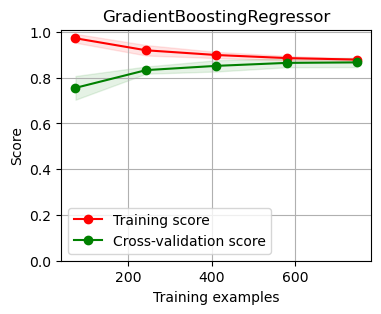

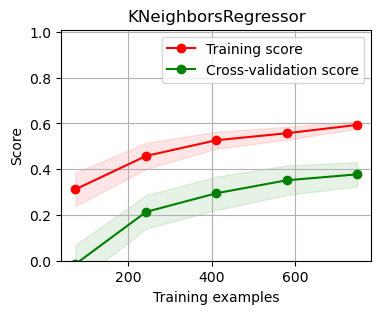

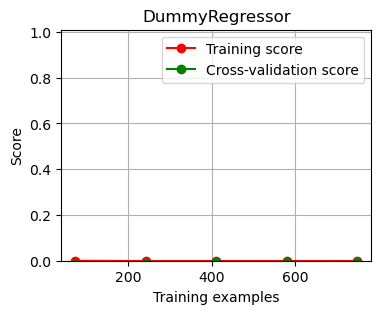

In [37]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(GradientBoostingRegressor(), "GradientBoostingRegressor", X_train, y_train, (0, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(KNeighborsRegressor(), "KNeighborsRegressor", X_train, y_train, (0, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(DummyRegressor(), "DummyRegressor", X_train, y_train, (0, 1.01), cv=cv, n_jobs=4)
plt.show()

# Model Improvement 
As you could tell our models still aren't stunningly amazing yet and theres still lots they can improve on

### Hyperparameter Tuning
Finding Parameters of GradientBoostingClassifier

In [38]:
list(GradientBoostingRegressor().get_params().keys())

['alpha',
 'ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

## RandomSearchCV
good for large dataset

In [45]:
print(format(' Results from RandomSearchCV ', '*^82'))
import warnings
warnings.filterwarnings("ignore")
# Load Libraries

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt

model = GradientBoostingRegressor()
parameters = {'max_leaf_nodes' : sp_randInt(4, 10),
            'max_depth': sp_randInt(5, 100)
}
                
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,cv = 2, n_iter = 10, n_jobs =- 1)
randm.fit(X_train, y_train)
print("\n The best estimator across ALL searched params: \n",randm.best_estimator_)
print("\n The best score across ALL searched params: \n", randm.best_score_)
print("\n The best parameters across ALL searched params: \n", randm.best_params_)


************************** Results from RandomSearchCV ***************************

 The best estimator across ALL searched params: 
 GradientBoostingRegressor(max_depth=25, max_leaf_nodes=4)

 The best score across ALL searched params: 
 0.8412355077482994

 The best parameters across ALL searched params: 
 {'max_depth': 25, 'max_leaf_nodes': 4}


## GridSearchCV 
takes very long for large sets of data

In [47]:
print(format(' Results from GridSearchCV','*^82'))
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()
parameters = {'max_leaf_nodes' : [4,6,8,10,12],
            'max_depth': [i for i in range(10,100,10)]
}


grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs =- 1)
grid.fit(X_train, y_train)
print("\n The best estimator across ALL searched params: \n",grid.best_estimator_)
print("\n The best score across ALL searched params: \n", grid.best_score_)
print("\n The best parameters across ALL searched params: \n", grid.best_params_)


**************************** Results from GridSearchCV****************************

 The best estimator across ALL searched params: 
 GradientBoostingRegressor(max_depth=90, max_leaf_nodes=4)

 The best score across ALL searched params: 
 0.8415690594080225

 The best parameters across ALL searched params: 
 {'max_depth': 90, 'max_leaf_nodes': 4}


## GridSearch has a higher pecentage
although gridsearchcv will get the highest out of all the parameters, it is because it loops through all the parameters<br>
whereas randomsearchcv will just need to get lucky

# Cross validation

In [48]:
# using cross_val_score & KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

steps = [("scaler", StandardScaler()),         # scaling data
         ('RandomForestClassifier', KNeighborsRegressor())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, cv=kf)
print(scores)
print(scores.mean())

[0.80025978 0.83328463 0.80878796 0.82297602 0.83403401]
0.8198684789874079


# Model Improvement (Cross Validation)

In [49]:
# using cross_val_score & KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

steps = [("scaler", StandardScaler()),         # scaling data
         ('KNeighborsRegressor', KNeighborsRegressor())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, cv=kf)
print(scores)
print(scores.mean())

[0.82379066 0.79388284 0.85849866 0.80983687 0.83207092]
0.823615990606114


# Model Improvement (Regularize)
discourages learning a more complex or flexible model, so as to **avoid** the risk of **overfitting**
- Lasso
- Ridge

In [50]:
# Lasso
from sklearn.linear_model import Lasso

scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha,max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.7748396039321188, 0.7749392770230854, 0.7757393412773047, 0.7763004580020546, 0.7764100681698639]
0.7756457496808855


In [51]:
# Ridge
from sklearn.linear_model import Ridge

scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)
print(np.mean(scores))

[0.7748415523791606, 0.7748290476559623, 0.7720004011251889, 0.6812928038636157, 0.30551288283562217]
0.6616953375719099


# Scaling Data (With)

In [52]:
from sklearn.preprocessing import StandardScaler
steps = [
    ('scaler', StandardScaler()),
    ('KNeighborsRegressor', KNeighborsRegressor())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.815942512896062
3250.010734145522
28574691.394449823


# Scaling Data (Without)

In [53]:
steps = [
    ('KNeighborsRegressor', KNeighborsRegressor())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5208956834149996
5805.340391488807
74380337.40205437


# Feature Selection (Gini Importance | MDI)

reseting dataset<br>
water_quality - before new features<br>
water_quality_total - after new features<br>

In [54]:
patient_info = preprocess_inputs(dataset)
patient_info_total = new_feature(preprocess_inputs(dataset))

before adding new features

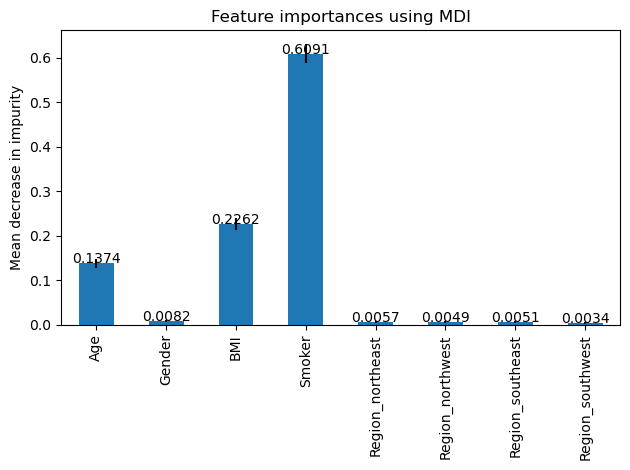

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = patient_info.drop("Cost ($)", axis=1)
y = patient_info["Cost ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(patient_info.drop("Cost ($)", axis=1).columns)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],4), ha = 'center')

import time

start_time = time.time()
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
addlabels(forest_importances,forest_importances)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

after adding new features

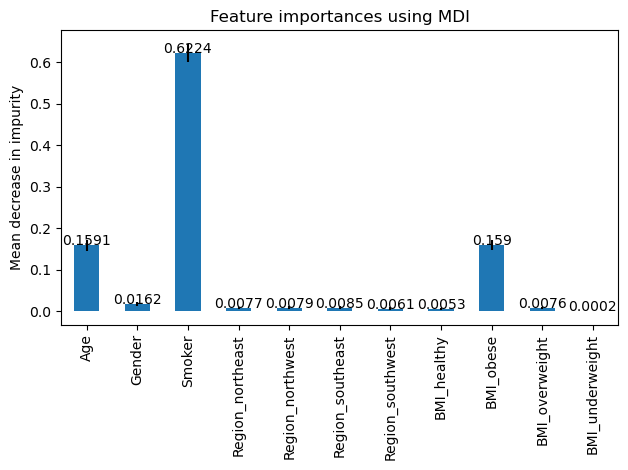

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = patient_info_total.drop("Cost ($)", axis=1)
y = patient_info_total["Cost ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(patient_info_total.drop("Cost ($)", axis=1).columns)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],4), ha = 'center')

import time

start_time = time.time()
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
addlabels(forest_importances,forest_importances)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Obeservation
### BMI > new_BMIs
- We Observed that new_BMIs is lower than both the original BMI.<br>
Hence making new_BMIs redundent as a new feature
### **Smoker** is also the **most important feature**

However, lets see if it helped with the model accuracy (R_Square)

In [57]:
steps = [
    ('KNeighborsRegressor', KNeighborsRegressor())]
pipeline = Pipeline(steps)

X = patient_info.drop("Cost ($)", axis=1)
y = patient_info["Cost ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.23274832386076327
7505.23346075
119114849.45555352


In [58]:
steps = [
    ('KNeighborsRegressor', KNeighborsRegressor())]
pipeline = Pipeline(steps)

X = patient_info_total.drop("Cost ($)", axis=1)
y = patient_info_total["Cost ($)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5208956834149996
5805.340391488807
74380337.40205437


Even though it was lower feature importance, it gave the model a higher R_Squared and Lower MAE and MSE<br>
This could be because the accumilative feature importance is higher than the original BMI<br>
- Higher importance means the model will predict more accurately with that feature (Target Value will be affect more by that feature)

# Feature Selection (Permutation Importance | MDA)

before adding new features

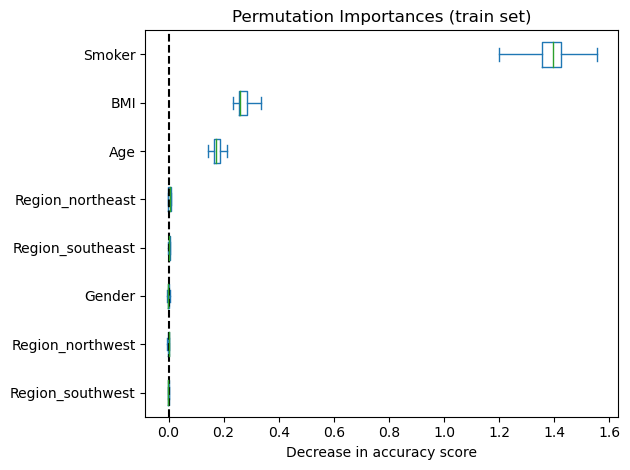

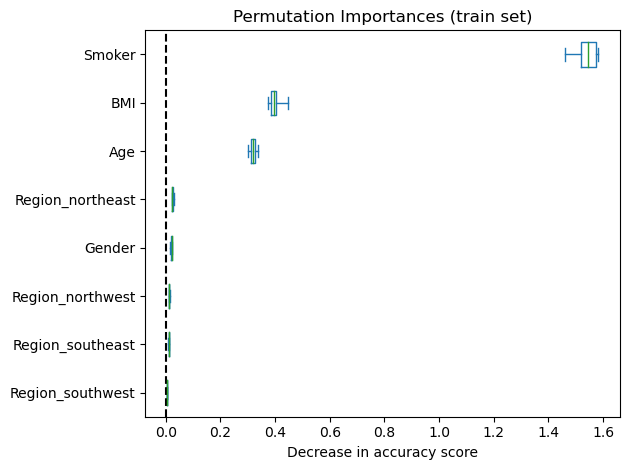

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X = patient_info.drop("Cost ($)", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(patient_info.drop("Cost ($)", axis=1).columns)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
X = patient_info.drop("Cost ($)", axis=1)


# Permuation Importance (Test Dataset)
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Permuation Importance (Train Dataset)
result = permutation_importance(
    forest, X_train, y_train, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

after adding new features

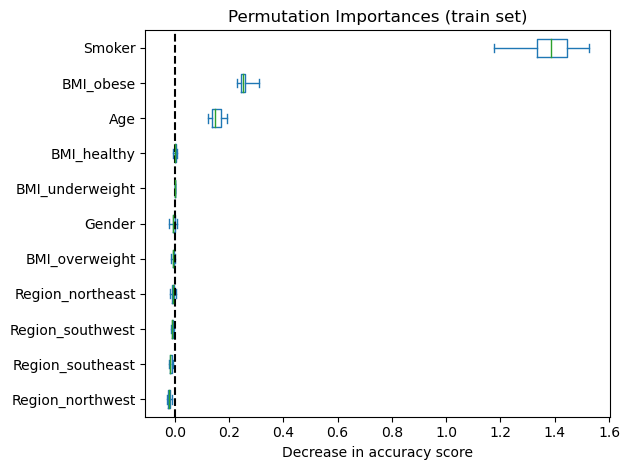

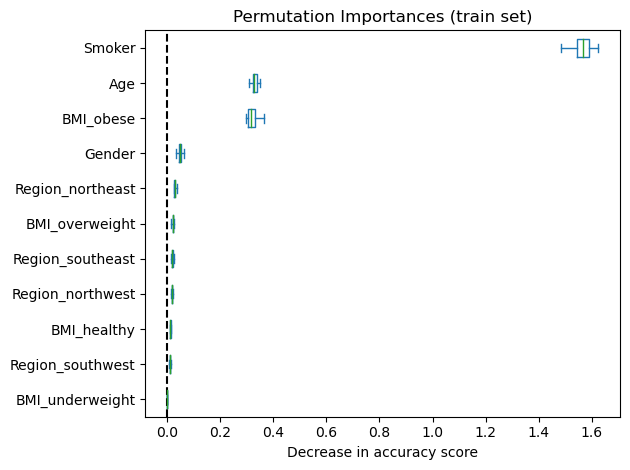

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = patient_info_total.drop("Cost ($)", axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
feature_names = list(patient_info_total.drop("Cost ($)", axis=1).columns)
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
X = patient_info_total.drop("Cost ($)", axis=1)


# Permuation Importance (Test Dataset)
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Permuation Importance (Train Dataset)
result = permutation_importance(
    forest, X_train, y_train, n_repeats=10, random_state=random_state, n_jobs=2
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# Saving our Model
Two wasys to save and load machine learning models:
1. with `pickle` module
2. with `joblib` module

**Pickle**

In [25]:
import pickle

# Save model to file
pickle.dump(gradiantBoost, open("Regression_GradientBoosting_model.pki","wb"))

In [27]:
# Getting saved model
loaded_pickle_model = pickle.load(open("./CA1-Models/Regression_GradientBoosting_model.pki","rb"))

In [33]:
print("loaded model:")
y_pred = loaded_pickle_model.predict(X_test)
print(loaded_pickle_model.score(X_test, y_test))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

print("\ncurrent model:")
print(loaded_pickle_model.score(X_test, y_test))
print(mean_absolute_error(y_test, gradiantBoost_y_pred))
print(mean_squared_error(y_test, gradiantBoost_y_pred))

loaded model:
0.8636374786692891
2568.145184526958
19994060.3128135

current model:
0.8636374786692891
2568.145184526958
19994060.3128135


**Joblib**

In [ ]:
from joblib import dump, load

# Save model to file
dump(gradiantBoost, filename="Regression_GradientBoosting_model.joblib")

In [ ]:
# Getting saved model

loaded_joblib_model = load(filename="./CA1-Models/Regression_GradientBoosting_model.joblib")

In [ ]:
print("loaded model:")
y_pred = loaded_pickle_model.predict(X_test)
print(loaded_pickle_model.score(X_test, y_test))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

print("\ncurrent model:")
print(loaded_pickle_model.score(X_test, y_test))
print(mean_absolute_error(y_test, gradiantBoost_y_pred))
print(mean_squared_error(y_test, gradiantBoost_y_pred))

# What I have Learn't

<hr>

**What R-squared does:**
- Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.
- if all your model does is predict the mean of the targets, it's R^2 value would be 0
- if your model perfectly predicts a range of numbers it's R^2 value would be 1.
<br><br><br>

**What is Mean Absolute Error (MAE)**
- The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models prediction are.
- Absolute(actual values - Predicted Values) > MEAN
<br><br><br>

**Best Model:**
- Minimize MSE + MAE
- Maximize R^2

## **Questions**
<hr>

✔️**How is your prediction task defined? And what is the meaning of the output variable?** 
<hr>

- Model should analize all the features and come to a prediction of the dependent variable (Cost ($))
- Cost ($)
    - Total Charges of the hospital bill
<br><br><br>
<hr>

✔️**Did you process the features in any way?**  
<hr>

- **Scaling**
    - Standardization
        - the mean and divide by variance (features centered to 0 & variance = 1)
    - Normalization
      - All of data values scaled *DOWN* ranges from -1 to +1
- **Continuize**
    - The Transformation of discrete (binary or multinominal) variables to continuous.
        - Gender  [male | Female]
        - Smoker  [yes | no]
        - Region  [Northeast | Northwest | Southeast | Southwest]
        - new_BMI [Underweight | Normal | Overweight | Obese]
- **Dropped**
    - we got rid of ID column because it is a primary key
<br><br><br>
<hr>

✔️**How did you select which learning algorithms to use?**  
<hr>

- **Scoring Methods**
    - R-sqaured | Coefficient of determination
        - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.
        - if all your model does is predict the mean of the targets, it's R^2 value would be 0
        - if your model perfectly predicts a range of numbers it's R^2 value would be 1.
    - Mean Absolute Error (MAE)
        - the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models prediction are.
        - Absolute(actual values - Predicted Values) => MEAN
    - Mean Squared Error (MSE)
        - the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models prediction are.
        - Square(actual values - Predicted Values) => MEAN
    - Root Mean Square Deviation (RMSE)
        - RMSE is measured in the same units as the target variable.
        - MSE is measured in units that are the *square* of the target variable
<br><br><br>
<hr>

✔️**Did you try to tune the hyperparameters of the learning algorithm, and in that case how?**
<hr>

  - **Hyperparameter Tuning**
    - Tuning the default parameters of the model to best fit the data given
  - **Yes**
    - *(KNearestNeighbors)*
      - Using GridSearchCV - chooses all combinations of the parameters (Takes very long)
      - Using RandomSearchCV - Randomly selects parameters for set amount of time (default= 10)
<br><br><br>
<hr>

✔️**How do you evaluate the quality of your system?**   
<hr>

- **Functions**
    - code reusablility 
- **Loops**
    - less repetitive code
- **Pipelines**
    - systematic sequence of tasks that show the flow of data
<br><br><br>
<hr>

✔️**How well does your system compare to a dummy baseline?**
<hr>

- DummyRegressor (Strategy - Mean)
    - Implements 4 simple rules of thumb for regression
        - Mean always predicts the mean of the training targets.
        - Median always predicts the median of the training targets.
        - Quantile always predicts a user provided quantile of the training targets.
        - Constant always predicts a constant value that is provided by the user.
    - The predict method completely ignores the input data.
<br><br><br>
<hr>

✔️**Is it possible to say something about which features the model considers important?**  
<hr>

&nbsp;&nbsp;&nbsp;&nbsp; https://hal.science/hal-02436169v3/file/importance_variable.pdf
- **Feature selection**
    - Mean Decrease in Impurity (MDI) - For Trees ONLY
        - sums up the gain associated to all splits performed along a given variable
    - Mean Decrease Accuracy (MDA)    - Any Predictive Model
        - shuffles entries of a specific variable in the test data set and computes the difference between the error on the permuted test set and the original test set.
- **Primary Keys**
    - the ID feature was just a primary key
<br><br><br>